# NumPy Arrays

We will study `NumPy` arrays in more detail.

In [1]:
import numpy as np

## Arrays

It should have become amply clear by now that both vectors and matrices are `NumPy` arrays. Each array in `NumPy` has a dimension. Vectors are one-dimensional arrays while matrices are two-dimensional arrays. For example:

$$
\mathbf{x} = \begin{bmatrix}
1\\
2\\
3
\end{bmatrix},
\mathbf{M} = \begin{bmatrix}
1 & 2\\
3 & 4\\
5 & 6
\end{bmatrix}
$$

In `NumPy`:

In [2]:
M = np.arange(1,7).reshape(3,2)
X = np.array([1,2,3])
print(M)
print(X)

[[1 2]
 [3 4]
 [5 6]]
[1 2 3]


In [6]:
M = np.arange(1,13).reshape(2,2,3)
print(M)
print(M[1])

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
[[ 7  8  9]
 [10 11 12]]


In [9]:
M = np.zeros((10000,784))
M = M.reshape(-1,28,28)
M.shape

(10000, 28, 28)

In [18]:
from sklearn.datasets import load_digits
data = load_digits()
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

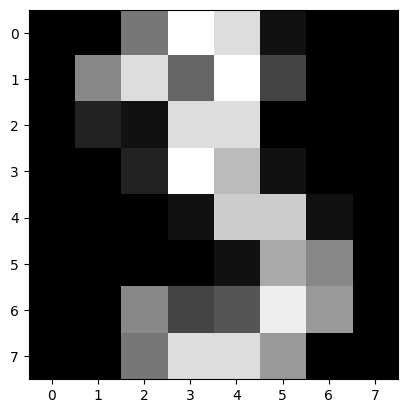

In [30]:
import matplotlib.pyplot as plt
plt.imshow(data.images[3],cmap="grey")

## Reshaping

Arrays can be reshaped. We will do a number of examples here.
### Example-1: Vector to matrix

We start with a vector:

$$
\mathbf{x} = \begin{bmatrix}
1 & 2 & 3 & 4 & 5 & 6
\end{bmatrix}
$$

We can reshape it into the following matrix:

$$
\mathbf{M} = \begin{bmatrix}
1 & 2\\
3 & 4\\
5 & 6
\end{bmatrix}
$$

In `NumPy`:

In [32]:
X = np.arange(1,7)
X.reshape(-1,2) # I needed 2 columns but didn't know how many rows, so -1 is given as argument when unknown

array([[1, 2],
       [3, 4],
       [5, 6]])

### Example-2: Matrix to vector

We now start with a matrix:

$$
\mathbf{M} = \begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6
\end{bmatrix}
$$

We can now reshape it into a vector:

$$
\mathbf{x} = \begin{bmatrix}
1 & 2 & 3 & 4 & 5 & 6
\end{bmatrix}
$$

In `NumPy`:

In [36]:
M = np.array([[1,2,3],
              [4,5,6]])
M.reshape(1,-1)[0] #to turn it into a numpy array

numpy.ndarray

### Example-3: Matrix to matrix

We can reshape a matrix into another matrix as well. Sometimes, we may not want to specify the dimensions completely. In such cases, we can let `NumPy` figure them out by letting one of the dimensions to be $-1$. For example:

$$
\mathbf{M} = \begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6
\end{bmatrix}
$$

Let us say we want to reshape it in such a way that there are three rows:

$$
\mathbf{P} = \begin{bmatrix}
1 & 2\\
3 & 4\\
5 & 6
\end{bmatrix}
$$

In `NumPy`:

In [37]:
M = np.arange(1,7).reshape(2,3)
P = M.reshape(3,2)
P

array([[1, 2],
       [3, 4],
       [5, 6]])

## Matrix-vector addition

Sometimes we would have to add a vector to each row or column of a matrix. There are two cases to consider. If the vector to be added is a:

- row vector
- column vector
### Row-vector

Consider the following matrix $\mathbf{M}$ and vector $\mathbf{b}$:

$$
\mathbf{M} = \begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6
\end{bmatrix}, \mathbf{b} = \begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
$$

There is a slight abuse of notation as we can't add a matrix and a vector together. However, the context often makes this clear:

$$
\mathbf{M} + \mathbf{b} = \begin{bmatrix}
2 & 4 & 6\\
5 & 7 & 9
\end{bmatrix}
$$

In `NumPy`:

In [38]:
M = np.arange(1,7).reshape(2,3)
b = np.array([1,2,3])
M + b # this uses broadcasting just like M * c (const)

array([[2, 4, 6],
       [5, 7, 9]])

### Column-vector

Now, consider another pair:

$$
\mathbf{M} = \begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6
\end{bmatrix}, \mathbf{b} = \begin{bmatrix}
1\\
2
\end{bmatrix}
$$

In this case, we have:

$$
\mathbf{M} + \mathbf{b} = \begin{bmatrix}
2 & 3 & 4\\
6 & 7 & 8
\end{bmatrix}
$$

In `NumPy`:

In [40]:
a = np.array([[1],[2]])
M + a

array([[2, 3, 4],
       [6, 7, 8]])

## Advanced Indexing

NumPy has some advanced indexing features.

In [50]:
M = np.arange(1,10).reshape(3,3)
print(M)
print()
print(M[[0,2]]) # this prints the 0th and 2nd row
print(M[:,[0,2]])# this prints the 0th and 2nd column
print(M[[0,2],[1,2]]) # this will give the 1th element of 0th row and 2nd element of 2nd row

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[1 2 3]
 [7 8 9]]
[[1 3]
 [4 6]
 [7 9]]
[2 9]


### Indexing using arrays

`NumPy` arrays themselves can be used as indices to retreive different parts of the array. For example:

$$
\mathbf{x} = \begin{bmatrix}
10 & 11 & 12 & 13 & 14 & 15 & 16
\end{bmatrix}
$$

Let us say that we are interested in retreiving indices: `[1, 3, 6]`.

In `NumPy`:

In [52]:
X = np.array([10,11,12,13,14,15,16])
X[[1,3,6]]

array([11, 13, 16])

### Filtering particular values

Sometimes we are interested in those elements of the array that possess a particular property:

$$
\mathbf{x} = \begin{bmatrix}
3 & 1 & 0 & -4 & -2 & 1 & 5
\end{bmatrix}
$$

Let us try to extract all elements that are positive.

In `NumPy`:

In [59]:
X = np.array([3,1,0,-4,-2,1,5])
X > 0

array([ True,  True, False, False, False,  True,  True])

In [60]:
X[X > 0]

array([3, 1, 1, 5])

In [61]:
X = np.array([[2, -1, 0],
              [1, -3, 5]])
y = np.array([1, -1, 1])

X[:,y==1] # this filterouts all the columns for which y = 1, like in 

array([[2, 0],
       [1, 5]])

In [73]:
M = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])
b = np.array([1, 2, 3])
b = np.expand_dims(b,axis=1)
M + b

array([[ 2,  3,  4,  5],
       [ 7,  8,  9, 10],
       [12, 13, 14, 15]])

### Filtering and follow-up

Consider a linear classifier:

$$
\mathbf{w} = \begin{bmatrix}
1 \\
0 \\
-1
\end{bmatrix}
$$

And a dataset:

$$
\mathbf{X} = \begin{bmatrix}
1 & 2 & -1 & 3\\
0 & 1 & -1 & 4\\
-1 & 3 & 0 & 5
\end{bmatrix},\\ \mathbf{y} = \begin{bmatrix}
1 & 1 & -1 & -1
\end{bmatrix}^T
$$

Find the accuracy of the classifier.

In [83]:
w = np.array([1,0,-1])
x = np.array([[1,2,-1,3],
              [0,1,-1,4],
              [-1,3,0,5]])
y = np.array([1,1,-1,-1])

y_ = np.sign(w @ x)

print(y_)

x[:,y == y_]


[ 1 -1 -1 -1]


array([[ 1, -1,  3],
       [ 0, -1,  4],
       [-1,  0,  5]])

## Operations along axes

Sometimes we may wish to do some operations on all the row-vectors of a matrix or all the column-vectors of the matrix. The idea of `axis` is important to understand how these operations can be done.
### Top-bottom

Top-bottom operations are done on row-vectors. For example, consider the matrix:

$$
\mathbf{A} = \begin{bmatrix}
1 & 2 & 3 & 4\\
5 & 6 & 7 & 8
\end{bmatrix}
$$

The sum of the row-vectors of the matrix is a vector:

$$
\text{rsum}(\mathbf{A}) = \begin{bmatrix}
6 & 8 & 10 & 12
\end{bmatrix}
$$

In `NumPy`:

In [84]:
A = np.arange(1,9).reshape(2,-1)
A.sum(axis=0)

array([ 6,  8, 10, 12])

### Left-right

Left-right operations are done on column-vectors.

$$
\mathbf{A} = \begin{bmatrix}
1 & 2 & 3 & 4\\
5 & 6 & 7 & 8
\end{bmatrix}
$$

The sum of the column-vectors of the matrix is a vector:

$$
\text{csum}(\mathbf{A}) = \begin{bmatrix}
10\\
26
\end{bmatrix}
$$

In `NumPy`:

In [85]:
A.sum(axis=1)

array([10, 26])

### Sum, Mean, Variance, Norm

Some of the operations that can be done in this manner. Let us use the following matrix to demonstrate this:

$$
\mathbf{M} = \begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{bmatrix}
$$

Let us find the following quantities:

- sum of column-vectors
- mean of row-vectors
- variance of row-vectors

In [90]:
M = np.arange(1,10).reshape(3,3)
print(M.sum(axis=1))
print(M.mean(axis=0))
print(M.var(axis=0))

[ 6 15 24]
[4. 5. 6.]
[6. 6. 6.]


## Stacking arrays

Sometimes, we would want to stack arrays. Consider the two matrices:

$$
\mathbf{A} =
\begin{bmatrix}
1 & 2\\
3 & 4
\end{bmatrix},
\mathbf{B} =
\begin{bmatrix}
5 & 6\\
7 & 8
\end{bmatrix}
$$

There are two ways to stack these two matrices:

- top-bottom
- left-right

In [93]:
A = np.arange(1,5).reshape(2,2)
B = np.arange(5,9).reshape(2,2)
print(np.concatenate((A,B),axis = 0)) #top-bottom
print(np.concatenate((A,B),axis = 1)) #left-right

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[[1 2 5 6]
 [3 4 7 8]]
